## Data Processing for "Automated Single Particle Reconstruction of Heterogeneous Inorganic Nanoparticles"

Import all necessary modules first.

In [1]:
%matplotlib inline

In [2]:
import hyperspy.api as hs
import ParticleSpy.api as ps
import glob
import numpy as np
import matplotlib.pyplot as plt
import wget
from zipfile import ZipFile

Download and extract the data. This may take some time so please be patient.

In [3]:
wget.download('https://zenodo.org/record/3964497/files/auto1_good.zip','1.zip')
with ZipFile('1.zip') as z:
    z.extractall()
wget.download('https://zenodo.org/record/3964497/files/auto2_good.zip','2.zip')
with ZipFile('2.zip') as z:
    z.extractall()
wget.download('https://zenodo.org/record/3964497/files/auto3_good.zip','3.zip')
with ZipFile('3.zip') as z:
    z.extractall()

100% [......................................................................] 162028871 / 162028871

Set segmentation parameters and run particle analysis on all images.

In [13]:
params = ps.parameters()
params.generate(threshold= 'li', watershed= True, watershed_erosion=10, watershed_size=40, min_size= 2000, rb_kernel= 301,gaussian= 1, pad=10, store_im=False)

In [14]:
particles = ps.Particle_list()
for filename in glob.glob('auto*/*.dm4'):
    ps.ParticleAnalysis(hs.load(filename),params,particles)

In [16]:
len(particles.list)

1337

Plot properties of segmented particles.

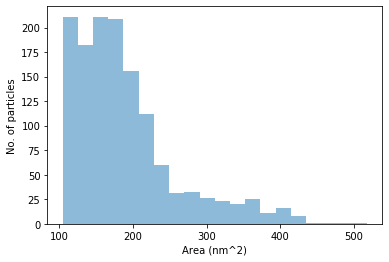

In [17]:
particles.plot(['area'])

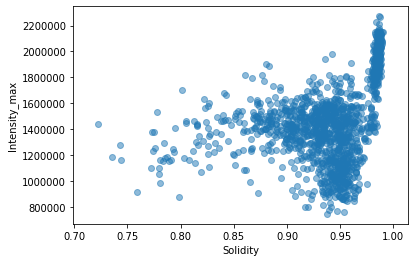

In [18]:
particles.plot(['solidity','intensity_max'])

## K-means clustering

All properties, 3 clusters

In [20]:
clustered_particles_nn_all_3 = particles.cluster_particles(algorithm='Kmeans',properties=['solidity','intensity_max','area','circularity','major axis length','minor axis length','eccentricity','intensity'],
                                                  n_clusters=3)

C:\Users\Thomas Slater\anaconda3\envs\pspy-dev\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


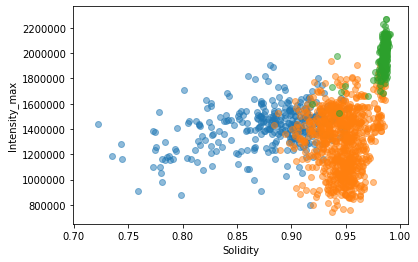

In [21]:
ps.plot(clustered_particles_nn_all_3,prop_list=['solidity','intensity_max'])

Select properties, 3 clusters

In [21]:
clustered_particles_nn_select_3 = particles.cluster_particles(algorithm='Kmeans',properties=['solidity','intensity_max','area'],
                                                  n_clusters=3)

<IPython.core.display.Javascript object>


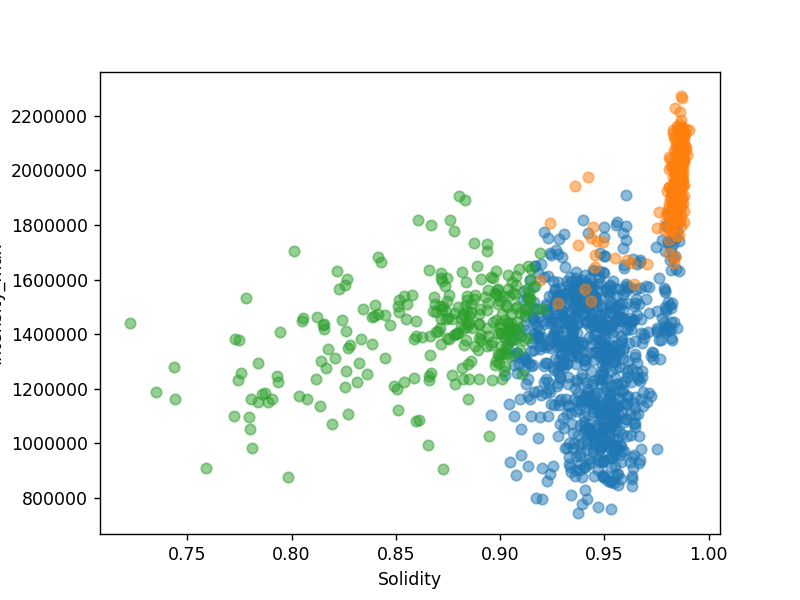

In [22]:
ps.plot(clustered_particles_nn_select_3,prop_list=['solidity','intensity_max'])

All properties, 4 clusters

In [38]:
clustered_particles_nn_all_4 = particles.cluster_particles(algorithm='Kmeans',properties=['solidity','intensity_max','area','circularity','major axis length','minor axis length','eccentricity','intensity'],
                                                  n_clusters=4)

C:\Users\Thomas Slater\anaconda3\envs\pspy-dev\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


<IPython.core.display.Javascript object>


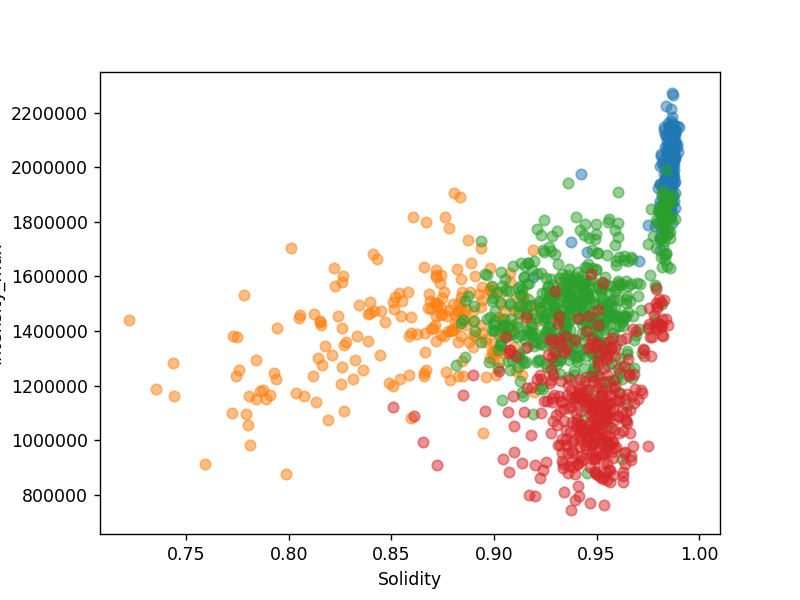

In [40]:
ps.plot([clustered_particles_nn_all_4[2],clustered_particles_nn_all_4[1],clustered_particles_nn_all_4[0],clustered_particles_nn_all_4[3]],prop_list=['solidity','intensity_max'])

## DBSCAN clustering

Select properties, min 12, eps 0.2

In [42]:
clustered_particles_DBSCAN_select = particles.cluster_particles(algorithm='DBSCAN',properties=['solidity','intensity_max','area'],
                                                  min_samples=12,eps=0.2)

<IPython.core.display.Javascript object>


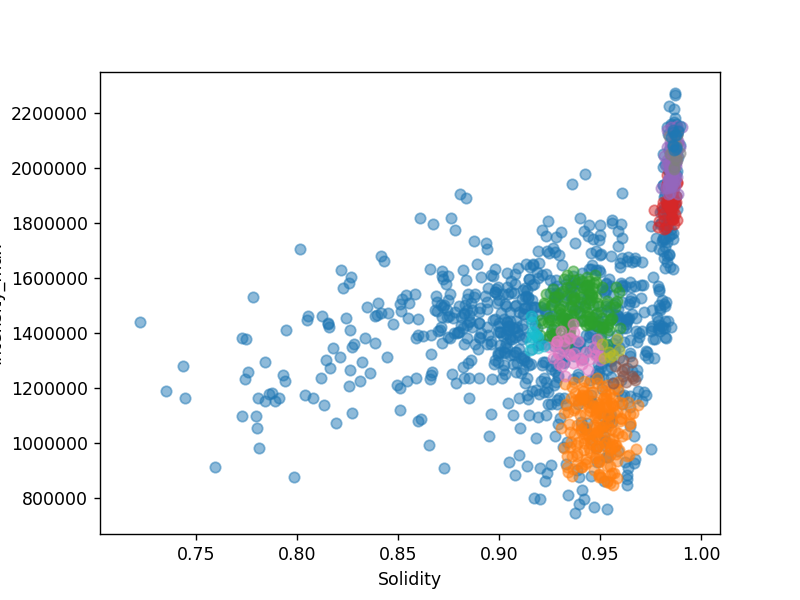

In [43]:
ps.plot(clustered_particles_DBSCAN_select,prop_list=['solidity','intensity_max'])

All properties, min 12, eps 0.5

In [93]:
clustered_particles_DBSCAN_all = particles.cluster_particles(algorithm='DBSCAN',properties=['solidity','intensity_max','area','circularity','major axis length','minor axis length','eccentricity','intensity'],
                                                  min_samples=12,eps=0.5)

C:\Users\Thomas Slater\anaconda3\envs\pspy-dev\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


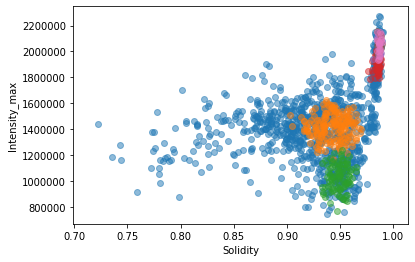

In [50]:
ps.plot(clustered_particles_DBSCAN_all,prop_list=['solidity','intensity_max'])

## OPTICS clustering

Select properties, min_samples 9

In [27]:
clustered_particles_OPTICS_select = particles.cluster_particles(algorithm='OPTICS',properties=['solidity','intensity_max','area'],
                                                  min_samples=8)

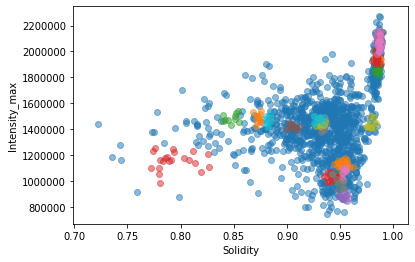

In [28]:
ps.plot(clustered_particles_OPTICS_select,prop_list=['solidity','intensity_max'])

All properties, min_samples 12

In [96]:
clustered_particles_OPTICS_all = particles.cluster_particles(algorithm='OPTICS',properties=['solidity','intensity_max','area','circularity','major axis length','minor axis length','eccentricity','intensity'],
                                                  min_samples=12)

C:\Users\Thomas Slater\anaconda3\envs\pspy-dev\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


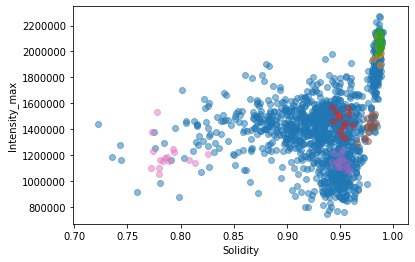

In [31]:
ps.plot(clustered_particles_OPTICS_all,prop_list=['solidity','intensity_max'])

All properties, min_samples 8

In [33]:
clustered_particles_OPTICS_all_8 = particles.cluster_particles(algorithm='OPTICS',properties=['solidity','intensity_max','area','circularity','major axis length','minor axis length','eccentricity','intensity'],
                                                  min_samples=8)

C:\Users\Thomas Slater\anaconda3\envs\pspy-dev\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


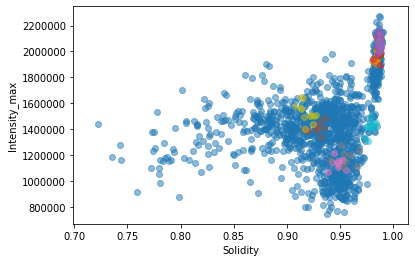

In [34]:
ps.plot(clustered_particles_OPTICS_all_8,prop_list=['solidity','intensity_max'])